In [22]:
import torch
import torch.nn as nn
from torchgeo.models import FarSeg
import torchvision

model = FarSeg(backbone='resnet34', classes=33, backbone_pretrained=True)
model.backbone.conv1 = nn.Conv2d(12, 64, kernel_size=7, stride=2, padding=3, bias=False)
model.decoder.classifier[1] = nn.AdaptiveAvgPool2d((120, 120))

model_weights = 'D:\Desktop\DLAGM_project\model_res34_summer_2.pth'

#model.load_state_dict(torch.load(model_weights, map_location=torch.device('cpu')))
model.load_state_dict(torch.load(model_weights, map_location=torch.device('cpu')), strict=False)

model.eval()


<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
C:\Users\agopu\AppData\Local\Temp\ipykernel_21056\2785716600.py:10: SyntaxWarning: invalid escape sequence '\D'
  model_weights = 'D:\Desktop\DLAGM_project\model_res34_summer_2.pth'
C:\Users\agopu\AppData\Local\Temp\ipykernel_21056\2785716600.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.ad

FarSeg(
  (backbone): ResNet(
    (conv1): Conv2d(12, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_ru

(120, 120)


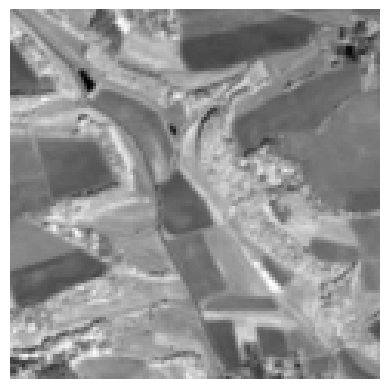

(120, 120)


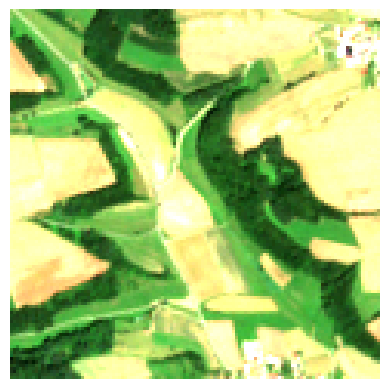

(60, 60)
Invalid shape (60, 60, 6) for image data
(20, 20)
Invalid shape (20, 20, 2) for image data
(120, 120)


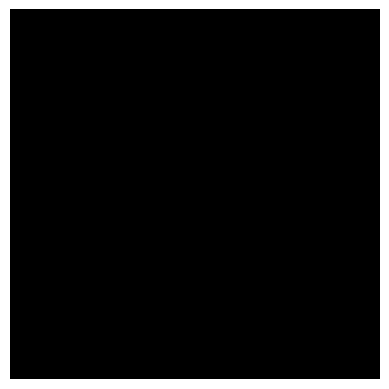

(120, 120)


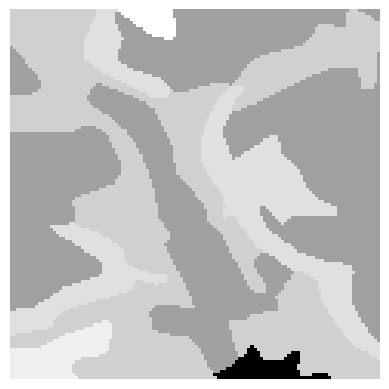

(120, 120)


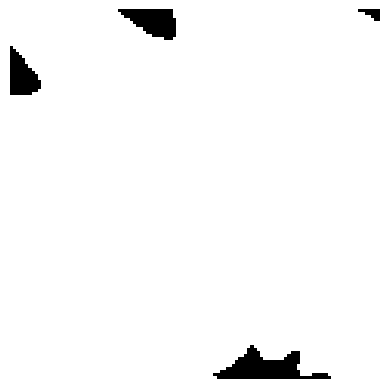

(120, 120)


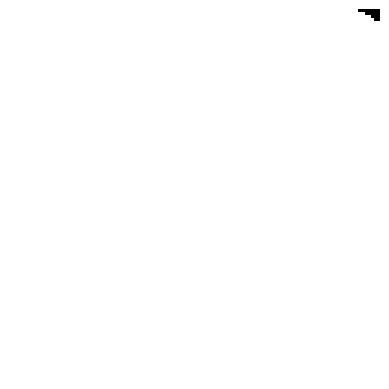

(120, 120)


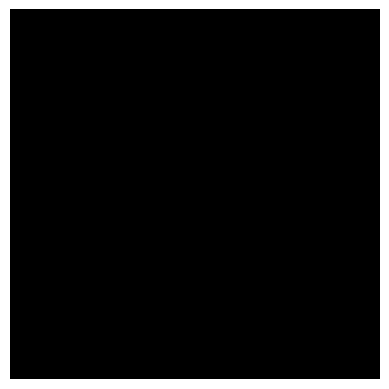

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import os
import torch
import rasterio
from rasterio.enums import Resampling

# Specifica il percorso della cartella
folder_path = r'summer500\32UPA_20180701T102021_49_809201_10_456656'

# Funzione per visualizzare l'immagine
def show_image(image_array):
    if image_array.shape[2] == 1:
        plt.imshow(image_array[:, :, 0], cmap='gray')
    elif image_array.shape[2] == 3:
        plt.imshow(image_array)
    else:
        print(f"Invalid shape {image_array.shape} for image data")
        return
    plt.axis('off')
    plt.show()

for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith('.tif'):
            image_path = os.path.join(root, file)
            try:
                with rasterio.open(image_path) as f:
                    width = f.width
                    height = f.height
                    image_size = (height, width)
                    array = f.read(
                        out_shape=[f.count, f.height, f.width],
                        out_dtype='int32',
                        resampling=Resampling.bilinear,
                    )
                    print(image_size)
                image = torch.from_numpy(array).float()
                
                if 'RGB' in file:
                    image = (image - image.min()) / (image.max() - image.min())
                    image = image * 3
                    image = torch.clamp(image, 0, 1)
                
                # Converti l'immagine in un array numpy per la visualizzazione
                image_array = image.numpy().transpose(1, 2, 0)
                
                show_image(image_array)
            except Exception as e:
                print(f"Cannot identify image file {image_path}: {e}")

In [24]:
import torch
from torch import Tensor
import rasterio
from rasterio.enums import Resampling


tensor = torch.empty(12, *image_size)
current_channel = 0

for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith('.tif') and any(substring in file for substring in ['10m_RGB', '10m_IR', '20m', '60m']):
            image_path = os.path.join(root, file)
            with rasterio.open(image_path) as f:
                array = f.read(
                out_shape=[f.count, *list(image_size)],
                out_dtype='int32',
                resampling=Resampling.bilinear,
            )
            image = torch.from_numpy(array).float()
            num_channels = image.shape[0]
            tensor[current_channel:current_channel + num_channels] = image
            current_channel += num_channels

print(tensor.shape)
print(tensor)
print(current_channel)



torch.Size([12, 120, 120])
tensor([[[3453., 2955., 3206.,  ..., 2540., 2579., 2579.],
         [3747., 3395., 2909.,  ..., 2722., 2690., 2655.],
         [3858., 3940., 3518.,  ..., 3008., 2932., 3023.],
         ...,
         [1942., 1776., 2762.,  ..., 3358., 3297., 3247.],
         [2584., 2807., 3430.,  ..., 2903., 3154., 3313.],
         [3705., 3599., 3915.,  ..., 2383., 2652., 3038.]],

        [[ 579.,  728.,  646.,  ..., 1468., 1490., 1494.],
         [ 487.,  564.,  723.,  ..., 1452., 1488., 1440.],
         [ 510.,  419.,  554.,  ..., 1316., 1278., 1300.],
         ...,
         [ 187.,  151.,  202.,  ...,  948.,  948.,  902.],
         [ 217.,  225.,  221.,  ..., 1048.,  992.,  953.],
         [ 237.,  223.,  224.,  ..., 1266., 1182., 1108.]],

        [[ 745.,  831.,  776.,  ..., 1134., 1168., 1156.],
         [ 691.,  745.,  826.,  ..., 1140., 1152., 1148.],
         [ 713.,  680.,  724.,  ..., 1128., 1112., 1136.],
         ...,
         [ 264.,  217.,  349.,  ...,  975.

torch.Size([1, 12, 224, 224])
torch.Size([1, 33, 120, 120])
(33, 120, 120)
tensor([[24, 24, 24,  ..., 22, 22, 22],
        [24, 24, 24,  ..., 22, 22, 22],
        [24, 24, 24,  ..., 22, 22, 22],
        ...,
        [ 5,  5, 22,  ..., 17, 17, 17],
        [22, 22, 22,  ..., 17, 28, 28],
        [22, 22, 22,  ..., 17, 28, 28]])
--------------
tensor([[15., 15., 15.,  ..., 12., 12., 12.],
        [15., 15., 15.,  ..., 12., 12., 12.],
        [15., 15., 15.,  ..., 12., 12., 12.],
        ...,
        [17., 17., 17.,  ..., 15., 15., 15.],
        [17., 17., 17.,  ..., 15., 15., 15.],
        [17., 17., 17.,  ..., 15., 15., 15.]])
Accuracy: 0.15%


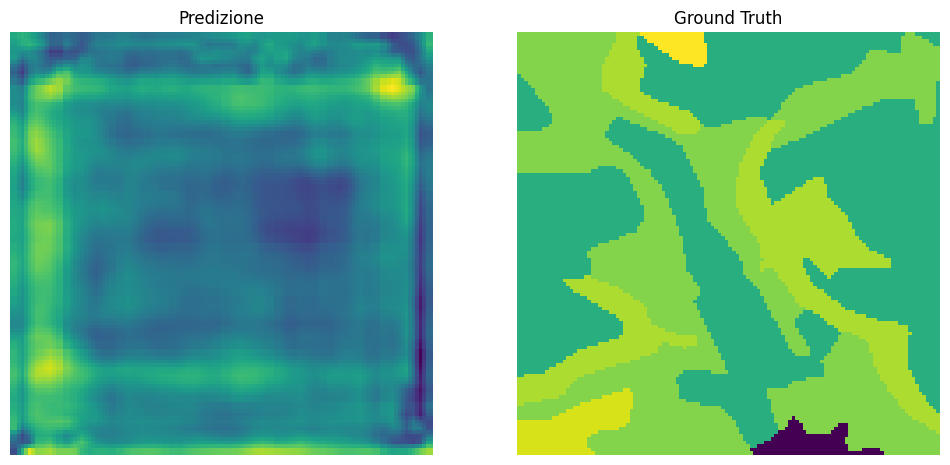

In [26]:
# Carica il ground truth tensor
ground_truth_path = r'summer500\32UPA_20180701T102021_49_809201_10_456656\32UPA_20180701T102021_49_809201_10_456656_labels.tif'
with rasterio.open(ground_truth_path) as f:
    ground_truth_array = f.read(
        out_shape=[f.count, f.height, f.width],
        out_dtype='int32',
        resampling=Resampling.bilinear,
    )
ground_truth_tensor = torch.from_numpy(ground_truth_array).float().squeeze(0)

with torch.no_grad():
    tensor_resized = torch.nn.functional.interpolate(tensor.unsqueeze(0), size=(224, 224), mode='bilinear', align_corners=False)
    print(tensor_resized.shape)
    predictions = model(tensor_resized)
    print(predictions.shape)

# Converti le previsioni in un array numpy
predictions_np = predictions.squeeze(0).numpy()
print(predictions_np.shape)

# Converti le previsioni in un tensore
predictions_tensor = torch.from_numpy(predictions_np).argmax(dim=0)
print(predictions_tensor)
print("--------------")
print(ground_truth_tensor)

# Calcola l'accuratezza
accuracy = (predictions_tensor == ground_truth_tensor).float().mean().item()
print(f'Accuracy: {accuracy * 100:.2f}%')
# Visualizza la predizione
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Predizione')
# Select the first channel to display
plt.imshow(predictions_np[0], cmap='viridis')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Ground Truth')
plt.imshow(ground_truth_tensor.numpy(), cmap='viridis')
plt.axis('off')

plt.show()

